## Imports

We import the libraries that we need for this project

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## Data prep

We import the training data set and create lagging feature based on the consumption. Additionally, we assume that the electricity price and some weather information are available 24 hours ahead.

In [5]:
data = pd.read_csv("ellevio-load-forecast-dataset.csv")
data.timestamp = pd.to_datetime(data.timestamp)
data['Time'] = np.arange(len(data.index))
data.holiday_flag = data.holiday_flag.replace({"Y":1, "N":0})
data = pd.get_dummies(data)
data = data.dropna()
data = data[data.timestamp >= "2013-1-01 00:00:00"]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45809 entries, 8785 to 54767
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   timestamp                                                   45809 non-null  datetime64[ns]
 1   temperature_forecast                                        45809 non-null  float64       
 2   holiday_flag                                                45809 non-null  int64         
 3   work_day                                                    45809 non-null  int64         
 4   power                                                       45809 non-null  float64       
 5   hour                                                        45809 non-null  int64         
 6   cal_week_in_year                                            45809 non-null  int64         
 7   cal_day_in_year         

## Data Viz

To get an idea of how the consumption behaves we plot the power consumption over time. We see that there is some seasonality as well a slight upwards trend.

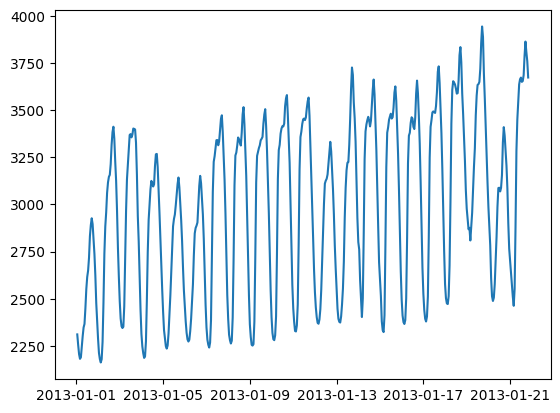

In [7]:
plt.figure()
plt.plot(data.timestamp.head(500), data.power.head(500))
plt.show()

In this step we include all the possible weather and lag features and divide the data into a test and train data set.

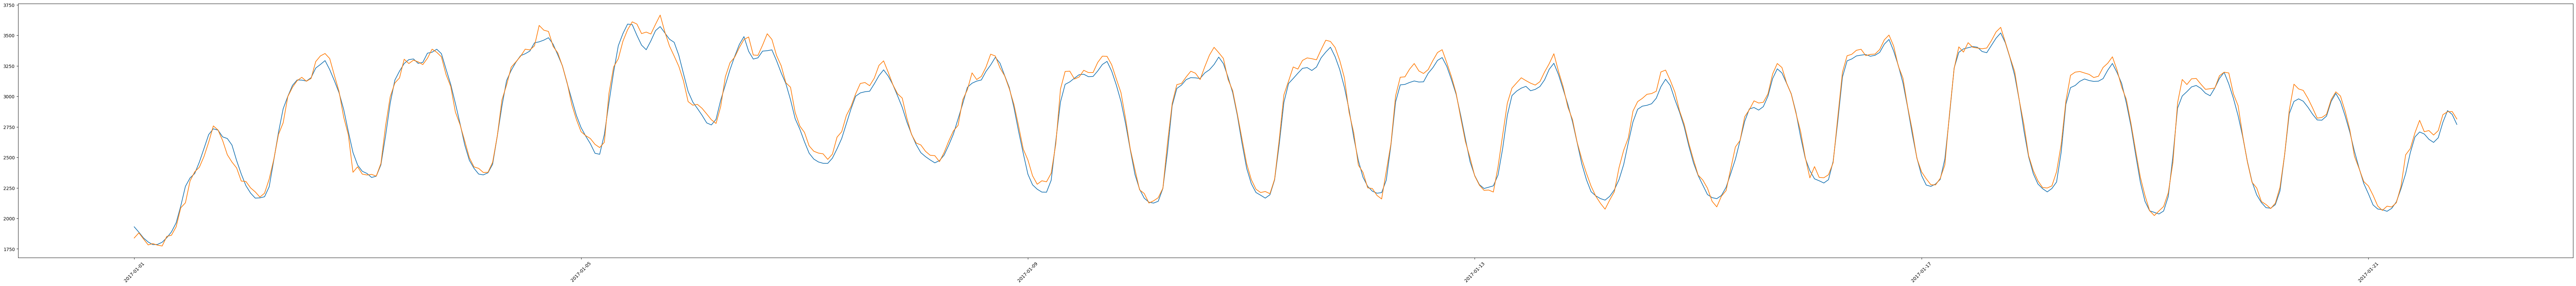

In [62]:
plt.figure(figsize=(100,10))
plt.plot(test.head(500)["timestamp"], test.head(500)["power"])
plt.plot(test.head(500)["timestamp"], (res_pred_test+trend_pred_test).head(500))
plt.xticks(rotation=45)
plt.show()